# Predicting NHL player salaries based on player stats

In this notebook, we take cleaned 2021-2022 NHL player performance metrics and salary data and attempt to use machine learning to predict the player's salary

Notebook will first test a series of sklearn linear regression model, and then move on to attempted to get a minimal mean square loss function attempting different neural network structures and activation functions, ultimately end with the best empirically found model (in terms of mean square error)

In [1]:
# imports
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
#Data load
data_df_initial = pd.read_csv(Path("df_final_outer_patrick.csv"))
data_df_initial = data_df_initial.dropna()
names_df = data_df_initial['Player']
data_df = data_df_initial.drop(columns=['Player','Tm','Unnamed: 0','Cap Hit'])


In [3]:
data_df["Salary"] = data_df["Salary"].replace('[,]', '', regex=True).astype(float)


In [4]:
# Create our features

y = data_df["Salary"]



In [5]:
# Create our target
X = data_df.drop(columns=['Salary'])

In [6]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
#Load and create the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
# Scale the training and testing data
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [8]:
#reshape into arrays for fitting dimensions
y = y.array
y =y.reshape(-1, 1)

y_train = y_train.array
y_train =y_train.reshape(-1, 1)

y_test= y_test.array
y_test =y_test.reshape(-1, 1)

In [9]:
X_scaler = scaler.fit(X)
X = X_scaler.transform(X)

In [10]:
y_scaler = scaler
y_scaler.fit(y)
y = y_scaler.transform(y)

In [11]:
y_scaler = scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [12]:
## Linear regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The r2 is 0.3089983966483989.
The mean squared error is 0.7609037083168833.
The root mean squared error is 0.8722979469865118.
The standard deviation is 1.0.


In [13]:
## Lasso
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is 0.37442562042969574.
The mean squared error is 0.6888578303354164.
The root mean squared error is 0.8299745961988333.


In [14]:
## DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is -0.35908739334565154.
The mean squared error is 1.4965734269030861.
The root mean squared error is 1.2233451789675251.


In [15]:
## HuberRegressor (factors in outliers)
from sklearn.linear_model import HuberRegressor, LinearRegression
model = HuberRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is 0.32927445681342093.
The mean squared error is 0.7385765106739405.
The root mean squared error is 0.8594047420592584.


C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Conclusions for linear regression machine learning models

Of the different sklearn models, the lasso solver gave the lowest mean square error value, though all the models were not too different in results. These models are lighter to run computationally and do not present the difficulty to calculate results, at the trade off of higher errors.

Neural networks were trained using a GTX 3070 Ti and NVDIA's cuda architecture 

In [16]:
## data must be very non linear, use tensorflow and keras

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [17]:
tf.random.set_seed(420)

In [18]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 729403548466529885
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5731516416
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8379496317603415471
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [19]:
X.shape

(769, 60)

In [20]:
number_inputs = 60
number_hidden_nodes = 1000

In [21]:
#Create initial neural network
nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="tanh"))
nn.add(Dense(1, activation="tanh"))

In [22]:
# Compile model
nn.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

In [23]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              61000     
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 62,001
Trainable params: 62,001
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Fit the model
nn_model = nn.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
18/18 [==============================] - 2s 2ms/step - loss: 1.0603 - mean_squared_error: 1.0603
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.9387 - mean_squared_error: 0.9387
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.7646 - mean_squared_error: 0.7646
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.7071 - mean_squared_error: 0.7071
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6846 - mean_squared_error: 0.6846
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.7026 - mean_squared_error: 0.7026
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6549 - mean_squared_error: 0.6549
Epoch 8/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6485 - mean_squared_error: 0.6485
Epoch 9/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.7013 - mean_squared_error: 0.7013
Epoch 10/1

In [25]:
y_pred = nn.predict(X)
y_pred_salary = y_scaler.inverse_transform(y_pred)

In [26]:
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

7/7 - 0s - loss: 0.8288 - mean_squared_error: 0.8288 - 105ms/epoch - 15ms/step
Normal Neural Network - Loss: 0.8287689685821533, Accuracy: 0.8287689685821533



Bad key text.latex.preview in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, 

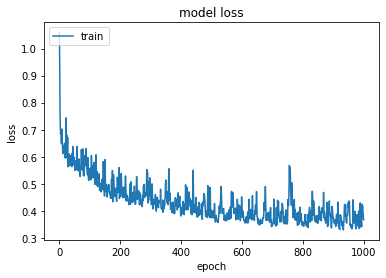

In [27]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkTanH_FullFeatures800Neurons.png')

In [29]:
#Extract feature importance data

from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='regression'
)

[]

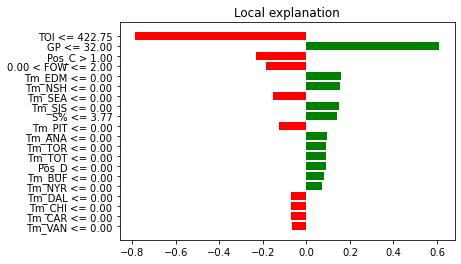

In [30]:
exp = explainer.explain_instance(X[15], nn.predict,
        num_features=20)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.plot()

In [31]:
features = []
features = exp.as_list()

In [32]:
features[42:]

[]

In [34]:
## Rerunning neural networks after droping the 18 least influencial features in order to determine if loss function improves



In [35]:
#Drop list of features
drop_list = ['S%','Tm_WPG','Tm_MTL','SH','Age','Tm_TOT','PS','Tm_PHI','Tm_OTT','Tm_PIT','Tm_ANA','GW','S','Pos_RW','Tm_CAR','EV','Tm_MIN','Pos_LW']

In [36]:
data_df_initial = pd.read_csv(Path("df_final_outer_patrick.csv"))
data_df_initial = data_df_initial.dropna()
names_df = data_df_initial['Player']
data_df = data_df_initial.drop(columns=['Player','Tm','Unnamed: 0','Cap Hit'])
data_df = data_df.drop(columns=drop_list)
data_df["Salary"] = data_df["Salary"].replace('[,]', '', regex=True).astype(float)
y = data_df["Salary"]

X = data_df.drop(columns=['Salary'])


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y = y.array
y =y.reshape(-1, 1)

y_train = y_train.array
y_train =y_train.reshape(-1, 1)

y_test= y_test.array
y_test =y_test.reshape(-1, 1)
X_scaler = scaler.fit(X)
X = X_scaler.transform(X)
y_scaler = scaler
y_scaler.fit(y)
y = y_scaler.transform(y)
y_scaler = scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [38]:
X.shape

(769, 42)

In [39]:
number_inputs = 42
number_hidden_nodes = 800

In [40]:
nn2 = Sequential()
nn2.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="tanh"))
nn2.add(Dense(1, activation="tanh"))

# Compile model
nn2.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 800)               34400     
                                                                 
 dense_3 (Dense)             (None, 1)                 801       
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Fit the model
nn2_model = nn2.fit(X_train, y_train, epochs=1500)

Epoch 1/1500
18/18 [==============================] - 0s 2ms/step - loss: 1.0071 - mean_squared_error: 1.0071
Epoch 2/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.7991 - mean_squared_error: 0.7991
Epoch 3/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.7023 - mean_squared_error: 0.7023
Epoch 4/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6608 - mean_squared_error: 0.6608
Epoch 5/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6326 - mean_squared_error: 0.6326
Epoch 6/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6044 - mean_squared_error: 0.6044
Epoch 7/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.5965 - mean_squared_error: 0.5965
Epoch 8/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.5854 - mean_squared_error: 0.5854
Epoch 9/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.5717 - mean_squared_error: 0.5717
Epoch 10/1

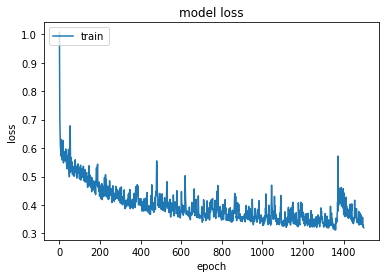

In [42]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn2_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkTanH_ReducedFeatures800Neurons.png')

In [43]:
df_review['Delta'] = df_review['Predicted Salary'] - data_df['Salary']
df_review = df_review.sort_values('Delta')

Epoch 1/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.1741 - mean_squared_error: 1.1741
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.7140 - mean_squared_error: 0.7140
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6906 - mean_squared_error: 0.6906
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.7253 - mean_squared_error: 0.7253
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.7419 - mean_squared_error: 0.7419
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6854 - mean_squared_error: 0.6854
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6111 - mean_squared_error: 0.6111
Epoch 8/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6113 - mean_squared_error: 0.6113
Epoch 9/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6097 - mean_squared_error: 0.6097
Epoch 10/1

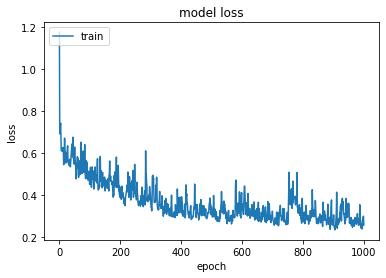

In [44]:
#Testing neural networks to see if greater accuracy could be acheived 

number_inputs = 42
number_hidden_nodes = 500

nn4 = Sequential()
nn4.add(Dense(units=900, input_dim=number_inputs, activation="tanh"))
nn4.add(Dense(1, activation="elu"))

# Compile model
nn4.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

nn4_model = nn4.fit(X_train, y_train, epochs=1000)

import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn4_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkTanHElu_ReducedFeatures900Neurons.png')

Epoch 1/1400
18/18 [==============================] - 0s 2ms/step - loss: 1.7263 - mean_squared_error: 1.7263
Epoch 2/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.9987 - mean_squared_error: 0.9987
Epoch 3/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.7956 - mean_squared_error: 0.7956
Epoch 4/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.7414 - mean_squared_error: 0.7414
Epoch 5/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.7118 - mean_squared_error: 0.7118
Epoch 6/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.7070 - mean_squared_error: 0.7070
Epoch 7/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.6875 - mean_squared_error: 0.6875
Epoch 8/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.6931 - mean_squared_error: 0.6931
Epoch 9/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.6874 - mean_squared_error: 0.6874
Epoch 10/1

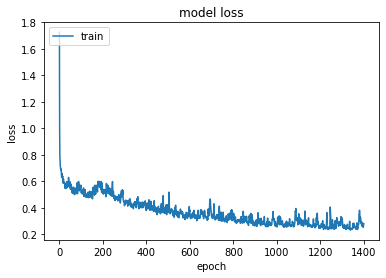

In [45]:
#Testing neural networks to see if greater accuracy could be acheived 

nn5 = Sequential()
nn5.add(Dense(units=300, input_dim=number_inputs, activation="tanh"))
nn5.add(Dense(1, activation="elu"))

# Compile model
nn5.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

nn5_model = nn5.fit(X_train, y_train, epochs=1400)

import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn5_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkEluTanh_ReducedFeatures300Neurons.png')

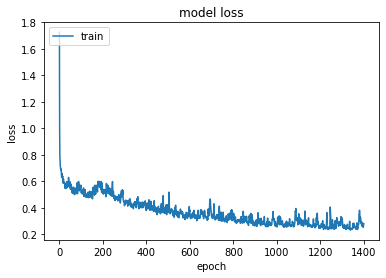

In [46]:
plt.plot(nn5_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkEluTanh_ReducedFeatures.png')


In [47]:
y_pred = nn5.predict(X)
data_df_initial["Y Scaled"] = y
data_df_initial["Y Pred"]= y_pred
data_df_initial["Predicted Salary"]= y_pred_salary
df_review = data_df_initial


In [51]:
df_review['Delta'] = df_review['Predicted Salary'] - data_df['Salary']
df_review=df_review.sort_values("Delta")

In [52]:
#Sort by delta of actual and predicted salary to identify misvalued players
df_review.head(10)

Unnamed: 0             Player   Tm      Salary     Cap Hit   Age    GP  \
3             3       Jeff Skinner  BUF  10000000.0   9000000.0  29.0  68.0   
10           10      Brayden Point  TBL   9000000.0   6750000.0  25.0  54.0   
9             9        Kevin Hayes  PHI   9000000.0   7142857.0  29.0  35.0   
12           12      Ryan McDonagh  TBL   8400000.0   6750000.0  32.0  60.0   
753         832       Drew Doughty  LAK  11000000.0  11000000.0  32.0  39.0   
14           14       Joe Pavelski  DAL   8000000.0   7000000.0  37.0  68.0   
17           17       Anze Kopitar  LAK   8000000.0  10000000.0  34.0  71.0   
22           22  Aleksander Barkov  FLA   7750000.0   5900000.0  26.0  56.0   
24           24      Jakub Voracek  CBJ   7500000.0   8250000.0  32.0  66.0   
25           25       Patrik Laine  CBJ   7500000.0   7500000.0  23.0  50.0   

        G     A   PTS  ...  Tm_WPG  Tm_WSH  Pos_C  Pos_D  Pos_LW  Pos_RW  \
3    28.0  22.0  50.0  ...     0.0     0.0    0.0    0.0     1.0     0.0   
10   27.0  27.0  54.0  ...     0.0     0.0    1.0    0.0     0.0     0.0   
9     8.0  16.0  24.0  ...     0.0     0.0    0.0    0.0     0.0     1.0   
12    3.0  18.0  21.0  ...     0.0     0.0    0.0    1.0     0.0     0.0   
753   7.0  24.0  31.0  ...     0.0     0.0    0.0    1.0     0.0     0.0   
14   25.0  43.0  68.0  ...     0.0     0.0    1.0    0.0     0.0     0.0   
17   18.0  41.0  59.0  ...     0.0     0.0    1.0    0.0     0.0     0.0   
22   33.0  39.0  72.0  ...     0.0     0.0    1.0    0.0     0.0     0.0   
24    5.0  44.0  49.0  ...     0.0     0.0    0.0    0.0     0.0     1.0   
25   25.0  26.0  51.0  ...     0.0     0.0    0.0    0.0     0.0     1.0   

     Y Scaled    Y Pred  Predicted Salary        Delta  
3    3.546240  3.530430        252940.375 -9747059.625  
10   3.080544  8.998200        252830.375 -8747169.625  
9    3.080544 -0.885911        263939.375 -8736060.625  
12   2.801127  7.472148        252853.125 -8147146.875  
753  4.011935  2.260683       3078718.750 -7921281.250  
14   2.614849  4.371496        252904.375 -7747095.625  
17   2.614849 -0.815115        373767.875 -7626232.125  
22   2.498425 -0.440839        253023.875 -7496976.125  
24   2.382001  3.770854        252821.625 -7247178.375  
25   2.382001  2.502457        273711.125 -7226288.875  

[10 rows x 69 columns]

In [53]:
df_review.tail(10)

Unnamed: 0            Player   Tm    Salary    Cap Hit   Age         GP  \
544         608  Corey Schueneman  MTL  750000.0   750000.0  26.0  19.000000   
548         612      Jack Johnson  COL  750000.0   750000.0  35.0  65.000000   
581         647       Josh Mahura  ANA  750000.0   750000.0  23.0  31.000000   
578         644    Vinni Lettieri  ANA  750000.0   750000.0  26.0  27.000000   
523         583  Andreas Johnsson  NJD  750000.0  3400000.0  27.0  62.000000   
526         586    Mason Geertsen  NJD  750000.0   725000.0  26.0  24.000000   
524         584   Dougie Hamilton  NJD  750000.0  9000000.0  28.0  49.000000   
591         658        Ben Hutton  VEG  750000.0   750000.0  28.0  47.000000   
590         657     Dylan Coghlan  VEG  750000.0   762500.0  23.0  56.000000   
656         730   Andrew Cogliano  COL  500000.0   500000.0  34.0  41.333333   

             G     A        PTS  ...  Tm_WPG  Tm_WSH  Pos_C  Pos_D  Pos_LW  \
544   2.000000   3.0   5.000000  ...     0.0     0.0    0.0    1.0     0.0   
548   1.000000   7.0   8.000000  ...     0.0     0.0    0.0    1.0     0.0   
581   1.000000   3.0   4.000000  ...     0.0     0.0    0.0    1.0     0.0   
578   5.000000   3.0   8.000000  ...     0.0     0.0    1.0    0.0     0.0   
523  12.000000  21.0  33.000000  ...     0.0     0.0    0.0    0.0     1.0   
526   0.000000   0.0   0.000000  ...     0.0     0.0    0.0    1.0     0.0   
524   9.000000  19.0  28.000000  ...     0.0     0.0    0.0    1.0     0.0   
591   3.000000   8.0  11.000000  ...     0.0     0.0    0.0    1.0     0.0   
590   3.000000  10.0  13.000000  ...     0.0     0.0    0.0    1.0     0.0   
656   2.666667   8.0  10.666667  ...     0.0     0.0    0.0    0.0     1.0   

     Pos_RW  Y Scaled     Y Pred  Predicted Salary      Delta  
544     0.0 -0.761443   1.922203         4493780.5  3743780.5  
548     0.0 -0.761443  11.018195         4493780.5  3743780.5  
581     0.0 -0.761443   1.858076         4493780.5  3743780.5  
578     0.0 -0.761443   1.528983         4493780.5  3743780.5  
523     0.0 -0.761443   6.237115         4493780.5  3743780.5  
526     0.0 -0.761443   5.921414         4493780.5  3743780.5  
524     0.0 -0.761443   8.716050         4493780.5  3743780.5  
591     0.0 -0.761443  -0.999997         4493780.5  3743780.5  
590     0.0 -0.761443  -0.999995         4493780.5  3743780.5  
656     0.0 -0.877867   6.558575         4456030.0  3956030.0  

[10 rows x 69 columns]

# Conclusions

We trained a variety of neural network models attempting to minimize the loss function. We varied the number of neurons and layers, and tested different activation functions (Tanh,Elu, Selu, Relu, Sigmoid, Softmax).

Findings:
- Additional layers and neurons will not necessarily lead to better loss functions. Increasing number of neurons will initially decrease the loss function, before pushing it up. Best approach is a balanced approach. Our best model had a 7.1 neurons per input feature
- Of the activation functions, only Sigmoid, Tanh and Elu gave decreasing loss functions with values < 1
- In terms of improving activation functions, performance went Sigmoid -> TanH -> Elu
- Through testing we noticed Elu worked best as the activation function of the output layer, and Tanh for the one hidden layer we are using